# 1.loading the data and training the model

In [71]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target





In [72]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
y_scores = clf.predict_proba(X_test)


# 2. ROC implementation

In [73]:
def multiclass_roc_ovs(y_true, y_scores, num_classes=3, num_thresholds=5):
    fpr = dict()
    tpr = dict()
    thresholds = dict()

    for i in range(num_classes):
        fpr[i] = []
        tpr[i] = []
        thresholds[i] = np.linspace(0, 1, num_thresholds)

        for threshold in thresholds[i]:
            tp = np.sum((y_scores[:, i] >= threshold) & (y_true == i))
            fp = np.sum((y_scores[:, i] >= threshold) & (y_true != i))
            tpr[i].append(tp / np.sum(y_true == i))
            fpr[i].append(fp / np.sum(y_true != i))

    return fpr, tpr, thresholds

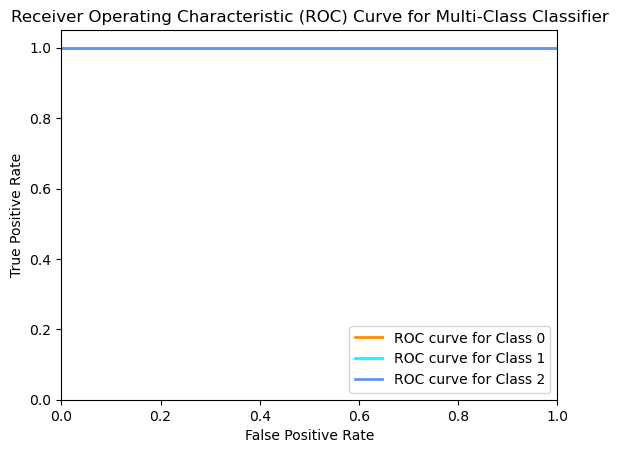

In [74]:
num_classes = len(np.unique(y))  # Number of classes
fpr, tpr, thresholds = multiclass_roc_ovs(y_test, y_scores, num_classes)

# Plot ROC curves for each class
plt.figure()

colors = ['darkorange', 'aqua', 'cornflowerblue','black']  # Change colors as needed
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve for Class {i}')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Classifier')
plt.legend(loc='lower right')
plt.show()